# Test the retrained YOLO model

Now that we have retrained our model we can test it against our 'test' images.

In [11]:
# If you did not use the Workbench image designed for this Lab, you can uncomment and run the following line to install the required packages.
# !pip install --no-cache-dir --no-dependencies -r requirements.txt

from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

import remote_infer

In the last notebook we saw how to re-trained the model. As this is a time-consuming tasks that would require GPUs to be efficient, we cannot really do it during the workshop.

So for your convenience, an already re-trained model, exported in the ONNX format, is available.

In [12]:
# Get the newly trained model.

model = YOLO("best.pt", task="detect")

In [13]:
# Test the model against an object image
image_path = "images/good-images-2.jpeg" # We know that Image3 represents a severe accident with over 86% certainty.

_, scale, original_image = remote_infer.preprocess(image_path)

original_image: np.ndarray = cv2.imread(image_path)
blob = cv2.dnn.blobFromImage(original_image, size=(640, 640), swapRB=False)
blob = np.ascontiguousarray(blob[0].transpose((1,2,0)))
results = model.predict(blob)


0: 640x640 1 good, 296.9ms
Speed: 4.0ms preprocess, 296.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
# Extract all the information from the result (type, bounding box, probability)

detections = []
result = results[0]
for box in result.boxes:
    class_id = int(box.cls.item())
    score = box.conf.item()
    unscaled_cords = box.xyxy.squeeze().tolist()
    cords = [round(unscaled_cords[0] * scale[1]), round(unscaled_cords[1] * scale[0]), round(unscaled_cords[2] * scale[1]), round(unscaled_cords[3] * scale[0])]
    detection = {
        'class_id': class_id,
        'class_name': result.names[class_id],
        'confidence': score,
        'box': cords,
        'scale': scale}
    detections.append(detection)
    print(detection)
    remote_infer.draw_bounding_box(original_image, class_id, score, cords[0], cords[1], cords[2], cords[3])

{'class_id': 0, 'class_name': 'good', 'confidence': 0.6881181597709656, 'box': [2, 3, 640, 640], 'scale': (1.0, 1.0)}


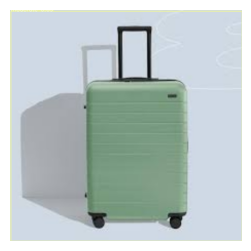

In [15]:
# On the image, draw the box, the name of the class, and the probability (how much the model is sure about the detection).

img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(6, 3)
plt.axis('off')
plt.imshow(img)


0: 640x640 1 good, 204.3ms
Speed: 3.4ms preprocess, 204.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


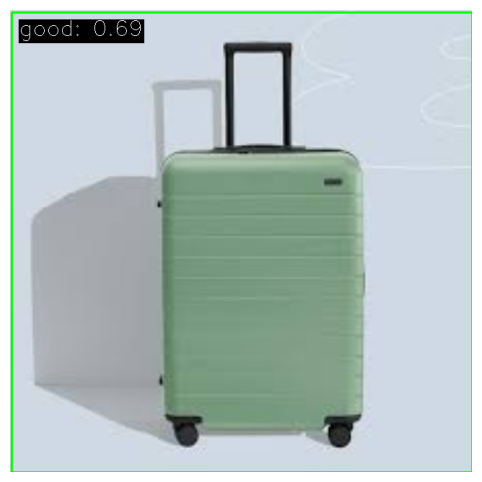

In [11]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the model
model = YOLO("best.pt", task="detect")

# Load the image
image_path = "images/good-images-2.jpeg"
original_image = cv2.imread(image_path)

# Preprocess the image if needed
_, scale, _ = remote_infer.preprocess(image_path)

# Convert image to blob format for model prediction
blob = cv2.dnn.blobFromImage(original_image, size=(640, 640), swapRB=False)
blob = np.ascontiguousarray(blob[0].transpose((1, 2, 0)))

# Run the model prediction
results = model.predict(blob)
result = results[0]

# Extract bounding boxes and classifications
for box in result.boxes:
    class_id = int(box.cls.item())
    score = box.conf.item()
    unscaled_cords = box.xyxy.squeeze().tolist()
    cords = [
        round(unscaled_cords[0] * scale[1]),
        round(unscaled_cords[1] * scale[0]),
        round(unscaled_cords[2] * scale[1]),
        round(unscaled_cords[3] * scale[0])
    ]

    # Draw bounding box
    color = (0, 255, 0)  # Green for bounding box
    thickness = 2
    cv2.rectangle(original_image, (cords[0], cords[1]), (cords[2], cords[3]), color, thickness)

    # Prepare the label with class name and confidence
    class_name = result.names[class_id] if class_id < len(result.names) else "Unknown"
    label = f"{class_name}: {score:.2f}"

    # Decrease the label size to half
    font_scale = 1  # Reduced font scale to half
    (label_width, label_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)

    # Determine the position for the label (shifted right and down)
    label_x = cords[0] + 10  # Move right by 10 pixels
    label_y = cords[1] + 20 + label_height  # Move down by 20 pixels

    # Ensure the label is within the image bounds
    if label_y < label_height:
        label_y = label_height

    # Draw label background for better visibility (change to black)
    label_background_top_left = (label_x, label_y - label_height - baseline)
    label_background_bottom_right = (label_x + label_width, label_y)
    cv2.rectangle(original_image, label_background_top_left, label_background_bottom_right, (0, 0, 0), cv2.FILLED)  # Black background

    # Draw label text (keeping it white)
    cv2.putText(original_image, label, (label_x, label_y - baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 1)

# Convert image to RGB for display
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.axis('off')
plt.imshow(img)
plt.show()



0: 640x640 1 damaged, 197.0ms
Speed: 3.0ms preprocess, 197.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


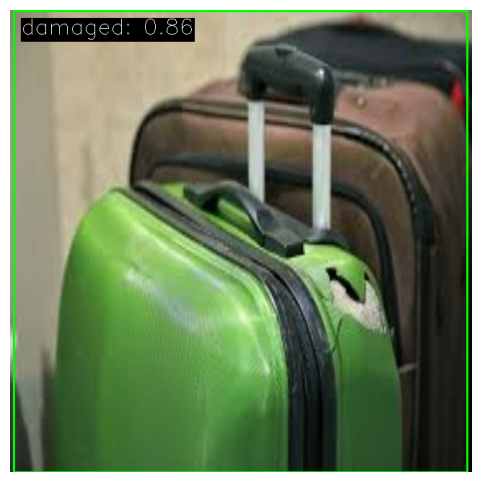

In [12]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the model
model = YOLO("best.pt", task="detect")

# Load the image
image_path = "images/bad-Unknown-7.jpeg"
original_image = cv2.imread(image_path)

# Preprocess the image if needed
_, scale, _ = remote_infer.preprocess(image_path)

# Convert image to blob format for model prediction
blob = cv2.dnn.blobFromImage(original_image, size=(640, 640), swapRB=False)
blob = np.ascontiguousarray(blob[0].transpose((1, 2, 0)))

# Run the model prediction
results = model.predict(blob)
result = results[0]

# Extract bounding boxes and classifications
for box in result.boxes:
    class_id = int(box.cls.item())
    score = box.conf.item()
    unscaled_cords = box.xyxy.squeeze().tolist()
    cords = [
        round(unscaled_cords[0] * scale[1]),
        round(unscaled_cords[1] * scale[0]),
        round(unscaled_cords[2] * scale[1]),
        round(unscaled_cords[3] * scale[0])
    ]

    # Draw bounding box
    color = (0, 255, 0)  # Green for bounding box
    thickness = 2
    cv2.rectangle(original_image, (cords[0], cords[1]), (cords[2], cords[3]), color, thickness)

    # Prepare the label with class name and confidence
    class_name = result.names[class_id] if class_id < len(result.names) else "Unknown"
    label = f"{class_name}: {score:.2f}"

    # Decrease the label size to half
    font_scale = 1  # Reduced font scale to half
    (label_width, label_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)

    # Determine the position for the label (shifted right and down)
    label_x = cords[0] + 10  # Move right by 10 pixels
    label_y = cords[1] + 20 + label_height  # Move down by 20 pixels

    # Ensure the label is within the image bounds
    if label_y < label_height:
        label_y = label_height

    # Draw label background for better visibility (change to black)
    label_background_top_left = (label_x, label_y - label_height - baseline)
    label_background_bottom_right = (label_x + label_width, label_y)
    cv2.rectangle(original_image, label_background_top_left, label_background_bottom_right, (0, 0, 0), cv2.FILLED)  # Black background

    # Draw label text (keeping it white)
    cv2.putText(original_image, label, (label_x, label_y - baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 1)

# Convert image to RGB for display
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.axis('off')
plt.imshow(img)
plt.show()


In examining the image, the re-trainined YOLO model correctly predicts an object with a decent % confidence.  A box is then drawn around the object and labelled accordingly.

Now that we have a model which can detect accident severity, let's create a predict function and serve our  model with ModelMesh.

**Go back to the Instructions of the Lab, to learn how to do that.**

**DO NOT open notebook `04-05-model-serving.ipynb` yet**.